In [172]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from __future__ import annotations
from typing import List

size_map = 250
max_generation = 3
# min_room_area_size = 
min_ratio_room_area = 10

In [173]:
class RoomArea:
    def __init__(self, x: int, y: int, x_width: int, y_width: int):
        self.x = x
        self.y = y
        self.x_width = x_width
        self.y_width = y_width
        self.child_areas: List[RoomArea] = []
    
    def add_child(self, room: RoomArea):
        self.child_areas.append(room)

    def plot(self, axs):
        axs.add_patch(plt.Rectangle((self.x, self.y), self.x_width, self.y_width, fc='grey', ec='black'))
        for child_area in self.child_areas:
            child_area.plot(axs)

In [174]:
def split(room: RoomArea):
    split_dir = np.random.randint(0,2)
    if split_dir:
        return "vertical", np.random.randint(room.x, room.x + room.x_width)
    else:
        return "horizontal", np.random.randint(room.y, room.y + room.y_width)
    

def generate(curr_room: RoomArea, num: int):
    if num >= max_generation:
        return
    
    split_direction, split_value = split(curr_room)
    if split_direction == "vertical":
        new_x_width = curr_room.x_width - split_value + curr_room.x
        if curr_room.y_width / new_x_width < min_ratio_room_area:
            new_x_width = np.ceil(curr_room.y_width / min_ratio_room_area)
            split_value = curr_room.x_width - new_x_width + curr_room.x
            
        curr_room.add_child(RoomArea(curr_room.x, curr_room.y, split_value, curr_room.y_width))
        curr_room.add_child(RoomArea(split_value, curr_room.y, new_x_width, curr_room.y_width))
    else:
        new_y_width = curr_room.y_width - split_value + curr_room.y
        if curr_room.x_width / new_y_width < min_ratio_room_area:
            new_y_width = np.ceil(curr_room.x_width / min_ratio_room_area)
            split_value = curr_room.y_width - new_y_width + curr_room.y
            
        curr_room.add_child(RoomArea(curr_room.x, split_value, curr_room.x_width, new_y_width))
        curr_room.add_child(RoomArea(curr_room.x, curr_room.y, curr_room.x_width, split_value))

    for room_area in curr_room.child_areas:
        generate(room_area, num+1)

    # for i in range(num):
    #     split_direction, split_value = split(curr_room)
    #     if split_direction == "vertical":
    #         curr_room.add_child(RoomArea(root.x, root.y, split_value, root.y_width))
    #         curr_room.add_child(RoomArea(split_value, root.y, root.x_width - split_value, root.y_width))
    #     else:
    #         curr_room.add_child(RoomArea(root.x, split_value, root.x_width, root.y_width - split_value))
    #         curr_room.add_child(RoomArea(root.x, root.y, root.x_width, split_value))        

In [175]:
x = 0; y = 0
root = RoomArea(x, y, size_map, size_map)
generate(root, 0)

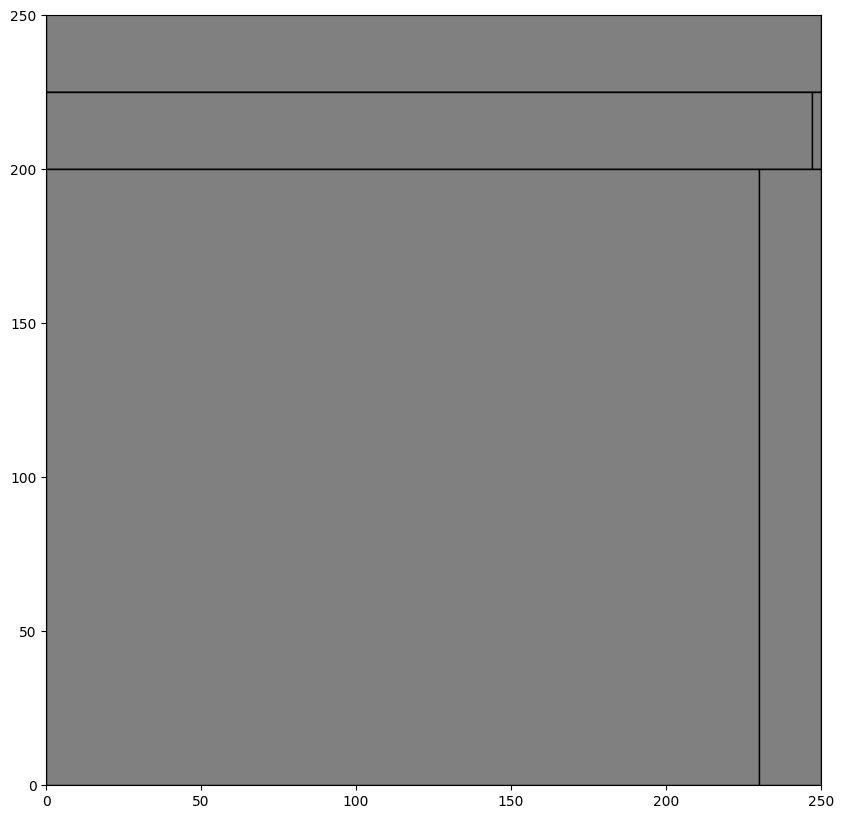

In [176]:
fig, axs = plt.subplots(1,1)
fig.set_size_inches(10,10)
plt.xlim(0, size_map)
plt.ylim(0, size_map)
root.plot(axs)
plt.show()